# Problem 4 of HW 2

In [ ]:
from qiskit import *
from math import *
import random

In [15]:
backend = BasicAer.get_backend('qasm_simulator')

In [33]:
# preparing state
def prepareState(qc):
    qc.reset(0)
    qc.reset(1)
    qc.h(0)
    qc.h(1)

In [35]:
# adding W operator
def addW(qc):
    qc.h(0)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    qc.h(0)
    qc.cx(1, 0)
    qc.h(0)
    qc.x(0)
    qc.x(1)
    qc.h(0)
    qc.h(1)

In [40]:
# set oracle. let it be a = 0
def setOracle_a0(qc):
    qc.x(0)
    qc.x(1)
    qc.h(0)
    qc.cx(1, 0)
    qc.h(0)
    qc.x(0)
    qc.x(1)

In [38]:
def addM(qc):
    qc.measure([0, 1], [0, 1])    

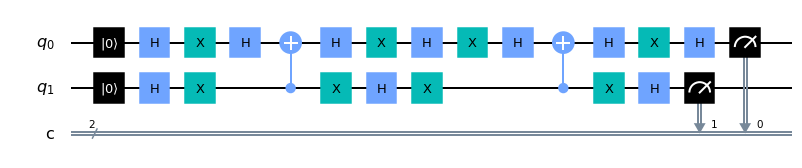

In [39]:
qc = QuantumCircuit(2,2)
prepareState(qc)
setOracle_a0(qc)
addW(qc)
addM(qc)
qc.draw('mpl')

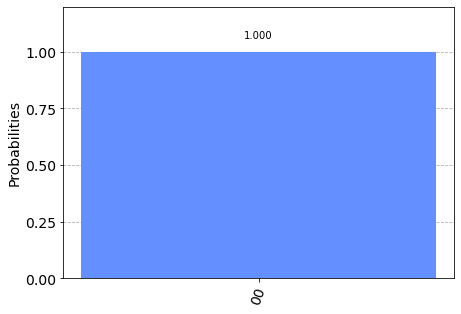

In [41]:
from qiskit.tools.visualization import plot_histogram
job = execute(qc, backend)

result = job.result()
plot_histogram([result.get_counts(qc)])

Ok, we got the result. a=0 (00)

In [58]:
# let's try another oracle -> a=3 / it is just cZ gate
def setOracle_a3(qc):
    qc.cz(0,1)

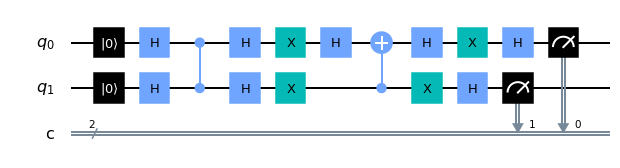

In [59]:
qc = QuantumCircuit(2,2)
prepareState(qc)
setOracle_a3(qc)
addW(qc)
addM(qc)
qc.draw('mpl')

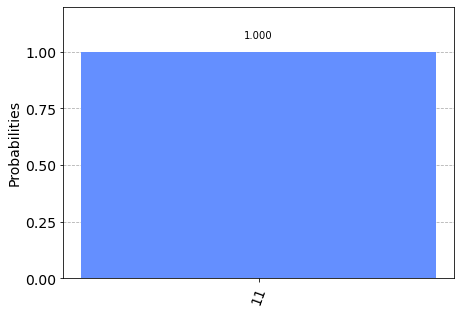

In [60]:
from qiskit.tools.visualization import plot_histogram
job = execute(qc, backend)

result = job.result()
plot_histogram([result.get_counts(qc)])

Done!

Let's check the overuse of algorithm

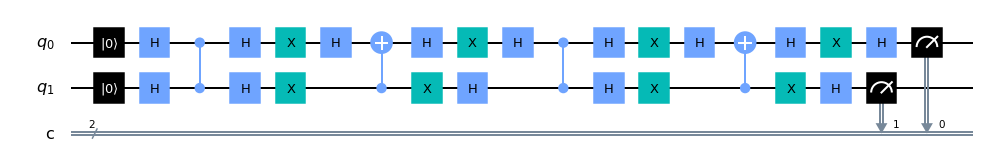

In [61]:
qc = QuantumCircuit(2,2)
prepareState(qc)
setOracle_a3(qc)
addW(qc)
#adding overlap
setOracle_a3(qc)
addW(qc)
addM(qc)
qc.draw('mpl')

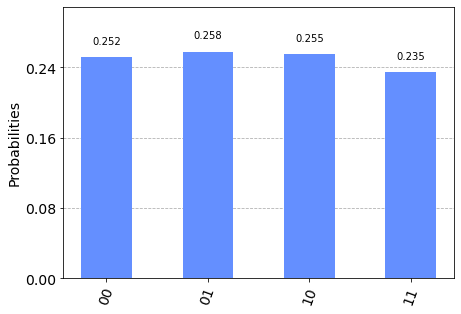

In [62]:
from qiskit.tools.visualization import plot_histogram
job = execute(qc, backend)

result = job.result()
plot_histogram([result.get_counts(qc)])

Done!